cài dec2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Cài đặt PyTorch và torchvision (Google Colab thường đã cài sẵn PyTorch, nhưng bạn vẫn nên cài lại nếu cần)
!pip install torch torchvision torchaudio

# Cài đặt Detectron2
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

!pip install scikit-learn matplotlib

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-12373o2k
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-12373o2k
  Resolved https://github.com/facebookresearch/detectron2.git to commit 536dc9d527074e3b15df5f6677ffe1f4e104a4ab
  Preparing metadata (setup.py) ... done


In [ ]:
# Reset runtime tự động (y như nhấn "Restart runtime")
import os
os.kill(os.getpid(), 9)


1. dataloader
Ta cần đăng ký dataset trong Detectron2 để sử dụng trong quá trình huấn luyện và đánh giá. Dưới đây là mã đăng ký dataset:


In [ ]:
import json

# Đường dẫn tới file annotation JSON
annotation_path = "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_train.json"
image_root = "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/train/"  # Thư mục chứa ảnh

# Đọc file annotation
with open(annotation_path, "r") as f:
    coco_annotations = json.load(f)

# Cập nhật đường dẫn trong "file_name"
for img_info in coco_annotations["images"]:
    img_info["file_name"] = image_root + img_info["file_name"]  # Gán đường dẫn đầy đủ

# Ghi lại file JSON mới
with open(annotation_path, "w") as f:
    json.dump(coco_annotations, f, indent=4)

print("✅ Đã cập nhật đường dẫn file_name thành công!")


✅ Đã cập nhật đường dẫn file_name thành công!


In [ ]:
import pandas as pd
import json

# Đọc file metrics.json
metrics_path = "/content/output/metrics.json"  # Đổi đường dẫn nếu cần
metrics = []

with open(metrics_path, "r") as f:
    for line in f:
        metrics.append(json.loads(line))  # Đọc từng dòng JSON

# Kiểm tra 5 dòng đầu tiên để hiểu cấu trúc
print("🔍 5 dòng đầu tiên của metrics.json:")
for i in range(min(5, len(metrics))):
    print(metrics[i])

# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(metrics)
df.to_csv("metrics_results.csv", index=False)

print("✅ Dữ liệu đã được lưu vào metrics_results.csv")


🔍 5 dòng đầu tiên của metrics.json:
{'data_time': 0.9371620535000602, 'eta_seconds': 2596.5670992097785, 'fast_rcnn/cls_accuracy': 0.65771484375, 'fast_rcnn/false_negative': 0.499970328170435, 'fast_rcnn/fg_cls_accuracy': 0.500029671829565, 'iteration': 19, 'loss_box_reg': 0.5097368359565735, 'loss_cls': 0.9230926334857941, 'loss_mask': 0.6473305523395538, 'loss_rpn_cls': 0.1917342096567154, 'loss_rpn_loc': 0.040173500776290894, 'lr': 9.9905e-05, 'mask_rcnn/accuracy': 0.7992110660859568, 'mask_rcnn/false_negative': 0.0, 'mask_rcnn/false_positive': 1.0, 'rank_data_time': 0.9371620535000602, 'roi_head/num_bg_samples': 111.9375, 'roi_head/num_fg_samples': 16.0625, 'rpn/num_neg_anchors': 239.5, 'rpn/num_pos_anchors': 16.5, 'time': 2.649558264499774, 'total_loss': 2.295551210641861}
{'data_time': 0.11505827600012708, 'eta_seconds': 1904.119204320159, 'fast_rcnn/cls_accuracy': 0.84814453125, 'fast_rcnn/false_negative': 1.0, 'fast_rcnn/fg_cls_accuracy': 0.0, 'iteration': 39, 'loss_box_reg': 0

catnhat

In [ ]:
import json
import os
from detectron2.structures import BoxMode

def load_coco_json_fixed(annotation_file, image_root, output_file):
    """Chuyển đổi COCO JSON thành định dạng Detectron2 và lưu vào file mới"""
    with open(annotation_file, "r") as f:
        coco_data = json.load(f)

    dataset_dicts = []

    for img_info in coco_data["images"]:
        record = {
            "file_name": img_info["file_name"],
            "image_id": img_info["id"],
            "height": img_info["height"],
            "width": img_info["width"],
            "annotations": []
        }

        for anno in coco_data["annotations"]:
            if anno["image_id"] == img_info["id"]:
                obj = {
                    "bbox": anno["bbox"],
                    "bbox_mode": BoxMode.XYWH_ABS,  # BBOX ở định dạng (x, y, width, height)
                    "segmentation": anno["segmentation"],
                    "category_id": anno["category_id"]
                }
                record["annotations"].append(obj)

        dataset_dicts.append(record)

    # Lưu dataset đã chuyển đổi vào file JSON mới
    with open(output_file, "w") as f_out:
        json.dump(dataset_dicts, f_out, indent=4)

    print(f"✅ Dữ liệu đã được lưu vào {output_file}")
    return dataset_dicts

# Đường dẫn file gốc và nơi lưu file mới
input_json = "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_val.json"
image_root = "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/val/"
output_json = "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_val_detectron2.json"

# Chuyển đổi và lưu file
load_coco_json_fixed(input_json, image_root, output_json)


✅ Dữ liệu đã được lưu vào /content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_val_detectron2.json


[{'file_name': '/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/val/DJI_20240930093804_0251_D.JPG',
  'image_id': 0,
  'height': 960,
  'width': 1280,
  'annotations': [{'bbox': [181.66666666666666, 0, 1097.3333333333333, 959],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'segmentation': [[181.66666666666666,
      1.874999999999953,
      322.29166666666663,
      224.79166666666663,
      577.5,
      598.75,
      830,
      959,
      1279,
      959,
      1279,
      0]],
    'category_id': 0},
   {'bbox': [37.91666666666666, 320.625, 774.0833333333334, 638.375],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'segmentation': [[37.91666666666666,
      483.125,
      328.54166666666674,
      320.625,
      366.04166666666674,
      344.5833333333333,
      383.75,
      343.54166666666663,
      812,
      959,
      342,
      959]],
    'category_id': 0},
   {'bbox': [0, 506.04166666666663, 325, 452.95833333333337],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'segmentation': [[29.5

Train với resnet50 trên hình 1280x960


In [ ]:
import os
import json
import torch
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.modeling import build_model
# Đăng ký dataset
def register_coco_dataset():
    # Đăng ký tập huấn luyện
    DatasetCatalog.register("coco_train0", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_train_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/train"))
    MetadataCatalog.get("coco_train0").set(thing_classes=["field", "other"])  # Đặt tên các lớp

    # Đăng ký tập validation
    DatasetCatalog.register("coco_val0", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_val_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/val"))
    MetadataCatalog.get("coco_val0").set(thing_classes=["field", "other"])

    # Đăng ký tập test (tùy chọn)
    DatasetCatalog.register("coco_test0", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_test_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/test"))
    MetadataCatalog.get("coco_test0").set(thing_classes=["field", "other"])

# Hàm load COCO JSON (giả sử COCO dataset được định dạng đúng)
def load_coco_json(annotation_file, image_root):
    with open(annotation_file) as f:
        coco_annotations = json.load(f)
    # Trả về dữ liệu đã chuẩn bị (các hàm này có thể thay đổi tùy thuộc vào cấu trúc của dataset)
    return coco_annotations

register_coco_dataset()
# Cấu hình mô hình
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("coco_train0",)
cfg.DATASETS.TEST = ("coco_val0",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # Số lớp trong dataset của bạn
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # Ngưỡng cho việc phân loại đối tượng

# Huấn luyện mô hình
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


# Đánh giá mô hình trên tập test
def evaluate_model(cfg, model, dataset_name="coco_test0"):
    evaluator = COCOEvaluator(dataset_name, cfg, False, output_dir="./output/")
    val_loader = build_detection_test_loader(cfg, dataset_name)
    results = inference_on_dataset(model, val_loader, evaluator)
    return results

# Đánh giá trên tập test
evaluate_model(cfg, trainer.model)


# Lưu mô hình
torch.save(trainer.model.state_dict(), "mask_rcnn_model.pth")

# Tải lại mô hình
model = build_model(cfg)
model.load_state_dict(torch.load("mask_rcnn_model.pth"))
model.eval()

[04/08 15:40:24 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:00, 189MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[04/08 15:40:25 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[04/08 15:41:23 d2.utils.events]:  eta: 0:42:34  iter: 19  total_loss: 2.993  loss_cls: 0.9571  loss_box_reg: 0.736  loss_mask: 0.693  loss_rpn_cls: 0.5017  loss_rpn_loc: 0.1323    time: 2.6343  last_time: 3.2610  data_time: 1.0737  last_data_time: 1.5811   lr: 4.9952e-05  max_mem: 9574M
[04/08 15:42:11 d2.utils.events]:  eta: 0:35:08  iter: 39  total_loss: 2.276  loss_cls: 0.5944  loss_box_reg: 0.8046  loss_mask: 0.6104  loss_rpn_cls: 0.1086  loss_rpn_loc: 0.1092    time: 2.2894  last_time: 1.9412  data_time: 0.2935  last_data_time: 0.2374   lr: 9.9902e-05  max_mem: 9575M
[04/08 15:42:51 d2.utils.events]:  eta: 0:32:02  iter: 59  total_loss: 1.933  loss_cls: 0.4716  loss_box_reg: 0.8326  loss_mask: 0.5278  loss_rpn_cls: 0.02234  loss_rpn_loc: 0.1017    time: 2.1859  last_time: 2.0367  data_time: 0.2980  last_data_time: 0.2448   lr: 0.00014985  max_mem: 9575M
[04/08 15:43:33 d2.utils.events]:  eta: 0:31:17  iter: 79  total_loss: 1.769  loss_cls: 0.3912  loss_box_reg: 0.8069  loss_mask:

GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequential(
        (0): BottleneckBlock

vẽ ma trận nhầm lẫn resnet101 trên hình 1280x960

[05/14 16:22:43 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[05/14 16:22:44 d2.engine.train_loop]: Starting training from iteration 0
[05/14 16:22:49 d2.utils.events]:  iter: 0  total_loss: 3.747  loss_cls: 1.02  loss_box_reg: 0.6923  loss_mask: 0.6867  loss_rpn_cls: 1.102  loss_rpn_loc: 0.2462    data_time: 0.8983  last_data_time: 0.8983   lr: 2.5e-06  max_mem: 12832M
[05/14 16:22:50 d2.engine.hooks]: Total training time: 0:00:02 (0:00:02 on hooks)
[05/14 16:22:50 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/14 16:22:50 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[05/14 16:22:50 d2.data.common]: Serializing 21 elements to byte tensors and concatenating them all ...
[05/14 16:22:50 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [05/14 16:22:50 d2.engine.defaults]: No evaluator found. Use `DefaultTrainer.test(evaluators=)`, or implement its `build_evaluator

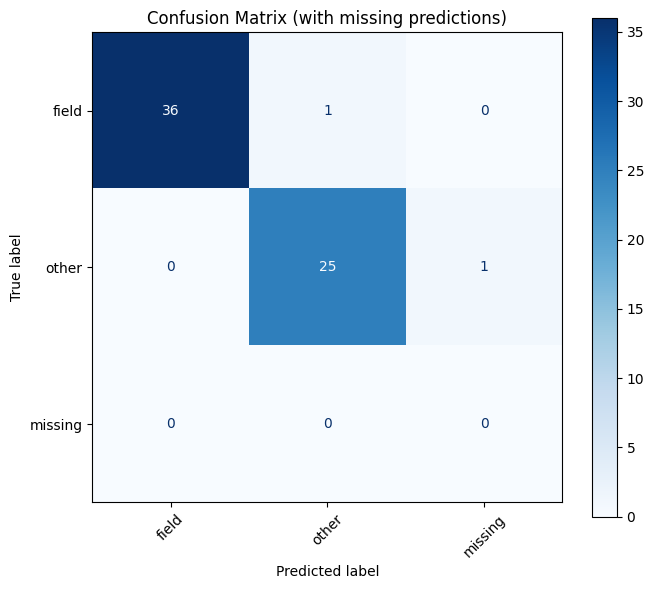


Classification Report:
Class 'field': Precision=1.0000, Recall=0.9730, F1-score=0.9863
Class 'other': Precision=0.9615, Recall=1.0000, F1-score=0.9804
Classification Report:

              precision    recall  f1-score   support

       field     1.0000    0.9730    0.9863        37
       other     0.9615    0.9615    0.9615        26

   micro avg     0.9839    0.9683    0.9760        63
   macro avg     0.9808    0.9673    0.9739        63
weighted avg     0.9841    0.9683    0.9761        63



In [ ]:
import os
import json
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.modeling import build_model

# ---- 1. Đăng ký COCO dataset ----
def load_coco_json(annotation_file, image_root):
    with open(annotation_file) as f:
        coco_annotations = json.load(f)
    return coco_annotations

def register_coco_dataset():
    DatasetCatalog.register("coco_train0", lambda: load_coco_json(
        "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_train_detectron2.json",
        "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/train"))
    MetadataCatalog.get("coco_train0").set(thing_classes=["field", "other"])

    DatasetCatalog.register("coco_val0", lambda: load_coco_json(
        "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_val_detectron2.json",
        "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/val"))
    MetadataCatalog.get("coco_val0").set(thing_classes=["field", "other"])

    DatasetCatalog.register("coco_test0", lambda: load_coco_json(
        "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_test_detectron2.json",
        "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/test"))
    MetadataCatalog.get("coco_test0").set(thing_classes=["field", "other"])



# ---- 2. Cấu hình mô hình ----
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("coco_train0",)
cfg.DATASETS.VAL = ("coco_val0",)
cfg.DATASETS.TEST = ("coco_test0",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.OUTPUT_DIR = "./output_mask_rcnn"

# ---- 3. Huấn luyện ----
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# ---- 4. Đánh giá mô hình ----
def evaluate_model(cfg, model, dataset_name="coco_test0"):
    model.eval()
    evaluator = COCOEvaluator(dataset_name, cfg, False, output_dir=cfg.OUTPUT_DIR)
    test_loader = build_detection_test_loader(cfg, dataset_name)
    results = inference_on_dataset(model, test_loader, evaluator)
    # Thực thi
    return results


import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
from detectron2.structures import Boxes, pairwise_iou
from detectron2.data import build_detection_test_loader

# Lấy ground truth và prediction theo từng ảnh, so khớp bằng IoU
def get_ground_truth_and_pred(model, cfg, dataset_name, score_thresh=0.5, iou_thresh=0.5):
    dataset_dicts = DatasetCatalog.get(dataset_name)  # chứa annotations đầy đủ
    data_loader = build_detection_test_loader(cfg, dataset_name)

    y_true = []
    y_pred = []

    for data, inputs in zip(dataset_dicts, data_loader):
        gt_classes = [anno["category_id"] for anno in data["annotations"]]
        gt_boxes_list = [anno["bbox"] for anno in data["annotations"]]
        gt_boxes = Boxes(torch.tensor(gt_boxes_list))
        gt_boxes.tensor[:, 2] += gt_boxes.tensor[:, 0]
        gt_boxes.tensor[:, 3] += gt_boxes.tensor[:, 1]

        outputs = model(inputs)[0]["instances"].to("cpu")

        if not outputs.has("pred_boxes") or not outputs.has("pred_classes") or not outputs.has("scores"):
            continue

        pred_boxes = outputs.pred_boxes
        pred_classes = outputs.pred_classes
        scores = outputs.scores

        keep = scores > score_thresh
        pred_boxes = pred_boxes[keep]
        pred_classes = pred_classes[keep]

        matched_pred_indices = set()
        ious = pairwise_iou(gt_boxes, pred_boxes)

        for gt_idx, gt_class in enumerate(gt_classes):
            matched = False
            for pred_idx in range(len(pred_classes)):
                if pred_idx in matched_pred_indices:
                    continue
                if ious[gt_idx, pred_idx] > iou_thresh:
                    y_true.append(gt_class)
                    y_pred.append(pred_classes[pred_idx].item())
                    matched_pred_indices.add(pred_idx)
                    matched = True
                    break
            if not matched:
                y_true.append(gt_class)
                y_pred.append(-1)  # không được dự đoán

    return y_true, y_pred

# Vẽ confusion matrix (bao gồm cả lớp "missing")
def plot_confusion_matrix(y_true, y_pred, class_names):
    labels = list(range(len(class_names))) + [-1]
    display_labels = class_names + ["missing"]
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    fig, ax = plt.subplots(figsize=(7, 6))
    disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
    plt.title("Confusion Matrix (with missing predictions)")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# In các chỉ số Precision, Recall, F1-score
def print_classification_report(y_true, y_pred, class_names):
    filtered_y_true = [yt for yt, yp in zip(y_true, y_pred) if yp != -1]
    filtered_y_pred = [yp for yp in y_pred if yp != -1]

    precision, recall, f1, _ = precision_recall_fscore_support(
        filtered_y_true, filtered_y_pred, labels=list(range(len(class_names))), zero_division=0
    )

    print("\nClassification Report:")
    for i, cls in enumerate(class_names):
        print(f"Class '{cls}': Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-score={f1[i]:.4f}")
from sklearn.metrics import classification_report

def print_classification_report1(y_true, y_pred, class_names):
    """
    In báo cáo phân loại (Precision, Recall, F1-score).
    """
    print("Classification Report:\n")
    report = classification_report(
        y_true,
        y_pred,
        labels=range(len(class_names)),
        target_names=class_names,
        zero_division=0,
        digits=4
    )
    print(report)

# ---- Sử dụng với mô hình đã load ----
# ---- 6. Load lại mô hình để đánh giá (vẽ confusion matrix) ----
model = build_model(cfg)
model.load_state_dict(torch.load("/content/gdrive/MyDrive/KLTN/dataset_RCNN/output_mask_rcnn10190/mask_rcnn_model.pth"))
model.eval()
class_names = ["field", "other"]
y_true, y_pred = get_ground_truth_and_pred(model, cfg, "coco_test0")
plot_confusion_matrix(y_true, y_pred, class_names)
print_classification_report(y_true, y_pred, class_names)
print_classification_report1(y_true, y_pred, class_names)

# ---- 5. Lưu mô hình ----
torch.save(trainer.model.state_dict(), "mask_rcnn_model.pth")






2. train với resnet101 trên hình 1280x960

In [ ]:
import os
import json
import torch
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.modeling import build_model
# Đăng ký dataset
def register_coco_dataset():
    # Đăng ký tập huấn luyện
    DatasetCatalog.register("coco_train0", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_train_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/train"))
    MetadataCatalog.get("coco_train0").set(thing_classes=["field", "other"])  # Đặt tên các lớp

    # Đăng ký tập validation
    DatasetCatalog.register("coco_val0", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_val_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/val"))
    MetadataCatalog.get("coco_val0").set(thing_classes=["field", "other"])

    # Đăng ký tập test (tùy chọn)
    DatasetCatalog.register("coco_test0", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/annotations/instances_test_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d1280/test"))
    MetadataCatalog.get("coco_test0").set(thing_classes=["field", "other"])

# Hàm load COCO JSON (giả sử COCO dataset được định dạng đúng)
def load_coco_json(annotation_file, image_root):
    with open(annotation_file) as f:
        coco_annotations = json.load(f)
    # Trả về dữ liệu đã chuẩn bị (các hàm này có thể thay đổi tùy thuộc vào cấu trúc của dataset)
    return coco_annotations

# Cấu hình mô hình
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("coco_train0",)
cfg.DATASETS.TEST = ("coco_test0",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # Số lớp trong dataset của bạn
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.005
cfg.SOLVER.MAX_ITER = 500
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # Ngưỡng cho việc phân loại đối tượng

# Huấn luyện mô hình
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


# Đánh giá mô hình trên tập test
def evaluate_model(cfg, model, dataset_name="coco_test0"):
    evaluator = COCOEvaluator(dataset_name, cfg, False, output_dir="./output_r101")
    val_loader = build_detection_test_loader(cfg, dataset_name)
    results = inference_on_dataset(model, val_loader, evaluator)
    return results

# Đánh giá trên tập test
evaluate_model(cfg, trainer.model)


# Lưu mô hình
torch.save(trainer.model.state_dict(), "mask_rcnn_model101.pth")

# Tải lại mô hình
model = build_model(cfg)
model.load_state_dict(torch.load("mask_rcnn_model101.pth"))
model.eval()

[05/13 18:21:59 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_a3ec72.pkl: 254MB [00:01, 249MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[05/13 18:22:00 d2.engine.train_loop]: Starting training from iteration 0
ERROR [05/13 18:22:05 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 155, in train
    self.run_step()
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/defaults.py", line 530, in run_step
    self._trainer.run_step()
  File "/usr/local/lib/python3.11/dist-packages/detectron2/engine/train_loop.py", line 322, in run_step
    losses.backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run th

OutOfMemoryError: CUDA out of memory. Tried to allocate 426.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 216.12 MiB is free. Process 12718 has 14.53 GiB memory in use. Of the allocated memory 13.57 GiB is allocated by PyTorch, and 841.49 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Train với resnet50 trên hình 640x480

In [ ]:
import os
import json
import torch
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.modeling import build_model
# Đăng ký dataset
def register_coco_dataset():
    # Đăng ký tập huấn luyện
    DatasetCatalog.register("coco_train1", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/annotations/instances_train_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/train"))
    MetadataCatalog.get("coco_train1").set(thing_classes=["class1", "class2", "class3"])  # Đặt tên các lớp

    # Đăng ký tập validation
    DatasetCatalog.register("coco_val1", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/annotations/instances_val_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/val"))
    MetadataCatalog.get("coco_val1").set(thing_classes=["class1", "class2", "class3"])

    # Đăng ký tập test (tùy chọn)
    DatasetCatalog.register("coco_test1", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/annotations/instances_test_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/test"))
    MetadataCatalog.get("coco_test1").set(thing_classes=["class1", "class2", "class3"])

# Hàm load COCO JSON (giả sử COCO dataset được định dạng đúng)
def load_coco_json(annotation_file, image_root):
    with open(annotation_file) as f:
        coco_annotations = json.load(f)
    # Trả về dữ liệu đã chuẩn bị (các hàm này có thể thay đổi tùy thuộc vào cấu trúc của dataset)
    return coco_annotations



register_coco_dataset()
# Cấu hình mô hình
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("coco_train0",)
cfg.DATASETS.TEST = ("coco_val0",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # Số lớp trong dataset của bạn
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # Ngưỡng cho việc phân loại đối tượng

# Huấn luyện mô hình
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


# Đánh giá mô hình trên tập test
def evaluate_model(cfg, model, dataset_name="coco_test1"):
    evaluator = COCOEvaluator(dataset_name, cfg, False, output_dir="./output/")
    val_loader = build_detection_test_loader(cfg, dataset_name)
    results = inference_on_dataset(model, val_loader, evaluator)
    return results

# Đánh giá trên tập test
evaluate_model(cfg, trainer.model)


# Lưu mô hình
torch.save(trainer.model.state_dict(), "mask_rcnn_model.pth")

# Tải lại mô hình
model = build_model(cfg)
model.load_state_dict(torch.load("mask_rcnn_model.pth"))
model.eval()

Train với resnet101 trên hình 640x480

In [ ]:
import os
import json
import torch
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.modeling import build_model
# Đăng ký dataset
def register_coco_dataset():
    # Đăng ký tập huấn luyện
    DatasetCatalog.register("coco_train1", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/annotations/instances_train_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/train"))
    MetadataCatalog.get("coco_train1").set(thing_classes=["class1", "class2", "class3"])  # Đặt tên các lớp

    # Đăng ký tập validation
    DatasetCatalog.register("coco_val1", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/annotations/instances_val_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/val"))
    MetadataCatalog.get("coco_val1").set(thing_classes=["class1", "class2", "class3"])

    # Đăng ký tập test (tùy chọn)
    DatasetCatalog.register("coco_test1", lambda: load_coco_json("/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/annotations/instances_test_detectron2.json", "/content/gdrive/MyDrive/KLTN/dataset_RCNN/d/test"))
    MetadataCatalog.get("coco_test1").set(thing_classes=["class1", "class2", "class3"])

# Hàm load COCO JSON (giả sử COCO dataset được định dạng đúng)
def load_coco_json(annotation_file, image_root):
    with open(annotation_file) as f:
        coco_annotations = json.load(f)
    # Trả về dữ liệu đã chuẩn bị (các hàm này có thể thay đổi tùy thuộc vào cấu trúc của dataset)
    return coco_annotations


# Cấu hình mô hình
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("coco_train1",)
cfg.DATASETS.VAL = ("coco_val1",)
cfg.DATASETS.TEST = ("coco_test1",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.OUTPUT_DIR = "./output_mask_rcnn"

# Huấn luyện mô hình
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


# Đánh giá mô hình trên tập test
def evaluate_model(cfg, model, dataset_name="coco_test1"):
    evaluator = COCOEvaluator(dataset_name, cfg, False, output_dir="./output/")
    val_loader = build_detection_test_loader(cfg, dataset_name)
    results = inference_on_dataset(model, val_loader, evaluator)
    return results

# Đánh giá trên tập test
evaluate_model(cfg, trainer.model)


# Lưu mô hình
torch.save(trainer.model.state_dict(), "mask_rcnn_model.pth")

# Tải lại mô hình
model = build_model(cfg)
model.load_state_dict(torch.load("mask_rcnn_model.pth"))
model.eval()

[05/14 15:39:23 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[05/14 15:39:23 d2.engine.train_loop]: Starting training from iteration 0
[05/14 15:40:19 d2.utils.events]:  eta: 0:46:57  iter: 19  total_loss: 2.209  loss_cls: 0.8241  loss_box_reg: 0.4705  loss_mask: 0.6676  loss_rpn_cls: 0.2281  loss_rpn_loc: 0.03833    time: 2.8116  last_time: 2.8346  data_time: 0.1376  last_data_time: 0.1020   lr: 4.9952e-05  max_mem: 12238M
[05/14 15:41:15 d2.utils.events]:  eta: 0:45:13  iter: 39  total_loss: 1.551  loss_cls: 0.396  loss_box_reg: 0.5847  loss_mask: 0.4946  loss_rpn_cls: 0.03846  loss_rpn_loc: 0.03104    time: 2.8047  last_time: 3.0496  data_time: 0.1292  last_data_time: 0.2102   lr: 9.9902e-05  max_mem: 12238M
[05/14 15:42:12 d2.utils.events]:  eta: 0:44:24  iter: 59  total_loss: 1.377  loss_cls: 0.2957  loss_box_reg: 0.618  loss_mask: 0.383  loss_rpn_cls: 0.0224  loss_rpn_loc: 0.02437    time: 2.8139  last_time: 2.9428  data_time: 0.1386  last_data_time: 0.2037   lr: 0.00014985  max_mem: 12238M
[05/14 15:43:07 d2.utils.events]:  eta: 0:43:26  

GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequential(
        (0): BottleneckBlock

In [ ]:
# Reset runtime tự động (y như nhấn "Restart runtime")
import os
os.kill(os.getpid(), 9)
